In [3]:
import pathlib
import timeit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import math


# Use the k-NN method (up to k_max) to predict the output variable on x_test, using the training data
def predict_knn(x_te, x_tr, y_tr, k_min=1, k_max=25):
    every_prediction = []
    for k in tqdm(range(k_min, k_max)):
        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k, p=2)
        # Fit the classifier to the data
        knn.fit(x_tr, y_tr)
        # Predict on x_test
        prediction = knn.predict(x_te)
        every_prediction.append(prediction)
    return every_prediction


# Check the accuracy of given predictions on the test set y_test
def check_accuracy(y_test, predictions):
    ground_truth = y_test.to_list()
    size = len(ground_truth)
    lst = []

    for predict in predictions:
        count = 0
        for i, j in enumerate(ground_truth):
            if predict[i] == ground_truth[i]:
                count += 1
        lst.append(count / size)
    return lst


# ---------------- PREPARE DATA ----------------

# Read the data
dirPath = "../Datasets/purchase600-100cls-15k.lrn.csv"

100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 83.84it/s]


Time:  0.2881304


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 42.74it/s]


Time:  0.5634895999999969


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.53it/s]


Time:  0.9802157999999963


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.53it/s]


Time:  1.453426400000012


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.46it/s]


Time:  2.0969247000000166


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.11it/s]


Time:  2.637963099999979


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.16it/s]


Time:  3.3544079000000124


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.50it/s]


Time:  4.367586799999998


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.34it/s]


Time:  5.533398500000004


100%|████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.72it/s]

Time:  6.4544745000000034


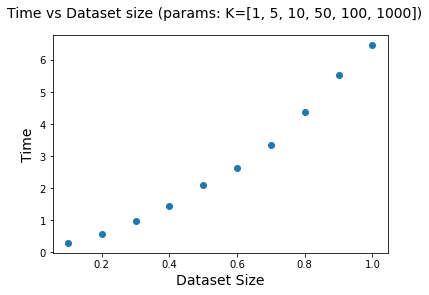

In [6]:
# PLOT TIME VS DATASET SIZE

selectionSizeRange = list(range(1, 11, 1))
runtime = [] 
for size in selectionSizeRange:
    df=pd.read_csv(dirPath)
    df = df.sample(int(math.floor(df.shape[0]*size/10)), random_state=35)
#     print(df.head())

    # Split into input and target variables
    X = df.iloc[:, 1:-1]  # Remove the ID and Class columns
    Y = df.iloc[:, -1]


    df_x_scaled = X
    
    KList = [1, 5, 10, 50, 100, 1000]

    X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, Y, test_size=0.1 , random_state=35)

    # RANDOM FORESTS
    start = timeit.default_timer()
    all_predictions = predict_knn(X_test, X_train, Y_train)
    stop = timeit.default_timer()
    time = stop - start
    print('Time: ', time)
    runtime.append(time)



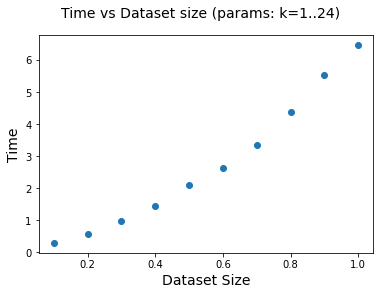

In [7]:
fig = plt.figure()
newList = [x / 10 for x in selectionSizeRange]
plt.scatter(newList, runtime)
fig.suptitle('Time vs Dataset size (params: k=1..24)', fontsize=14)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('Purchase_KNN_plot_timeVSdatasetsize.png')
plt.show()